![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

For this analysis, you'll use Official `FIFA World Cup` matches since `2002-01-01`, and you'll also assume that each match is fully independent, i.e., team form is ignored.

The p-value and the result of the test must be stored in a dictionary called `result_dict` in the form:

`result_dict = {"p_val": p_val, "result": result}`

where `p_val` is the p-value and `result` is either the string `"fail to reject"` or `"reject`", depending on the result of the test.

In [13]:
# Start your code here!
# We download the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.width", 1000)

# Read men's and women's datasets(comma sepereted values)
men = pd.read_csv("men_results.csv", index_col=0)
women = pd.read_csv("women_results.csv", index_col=0)

print(men.head(),"\n")
print(women.head())

         date home_team away_team  home_score  away_score tournament
0  1872-11-30  Scotland   England           0           0   Friendly
1  1873-03-08   England  Scotland           4           2   Friendly
2  1874-03-07  Scotland   England           2           1   Friendly
3  1875-03-06   England  Scotland           2           2   Friendly
4  1876-03-04  Scotland   England           3           0   Friendly 

         date home_team  away_team  home_score  away_score        tournament
0  1969-11-01     Italy     France           1           0              Euro
1  1969-11-01   Denmark    England           4           3              Euro
2  1969-11-02   England     France           2           0              Euro
3  1969-11-02     Italy    Denmark           3           1              Euro
4  1975-08-25  Thailand  Australia           3           2  AFC Championship


In [10]:
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]
women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]

In [14]:
men_subset["group"] = "men"
women_subset["group"] = "women"
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

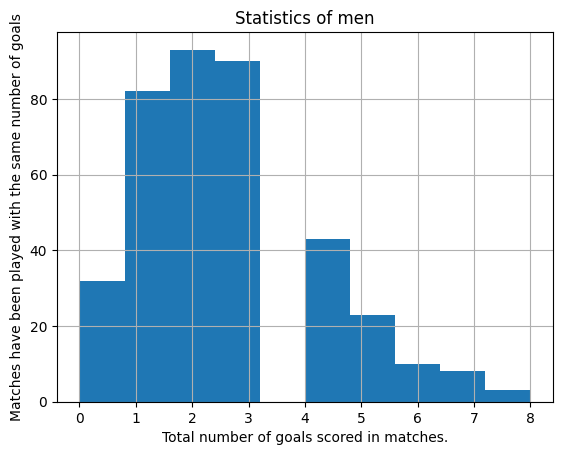

<Figure size 640x480 with 0 Axes>

In [15]:
men_subset["goals_scored"].hist()
plt.title("Statistics of men")
plt.xlabel("Total number of goals scored in matches.")
plt.ylabel("Matches have been played with the same number of goals")
plt.show()
plt.clf()

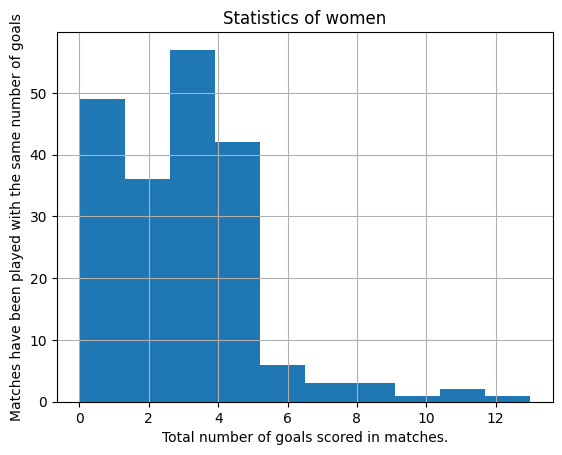

<Figure size 640x480 with 0 Axes>

In [16]:
women_subset["goals_scored"].hist()
plt.title("Statistics of women")
plt.xlabel("Total number of goals scored in matches.")
plt.ylabel("Matches have been played with the same number of goals")
plt.show()
plt.clf()

In [17]:
df = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)

subset_df = df[["goals_scored", "group"]]
both_subset_wide = subset_df.pivot(columns="group", values="goals_scored")

In [19]:
res = pingouin.mwu(x=both_subset_wide["women"],
                        y=both_subset_wide["men"],
                        alternative="greater")

print(res)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107  0.126901  0.563451


In [21]:
p_val = res['p-val'].values[0]

if p_val <= 0.1:
    result = "reject"
else:
    result = "fail to reject"
    
res_dict = {"p_val" : p_val,
            "result" : result}

print(res_dict)

{'p_val': 0.0051066098254436395, 'result': 'reject'}
